In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt

In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 833s 5us/step


In [23]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)

In [19]:
classes = ["airplane","autocombile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

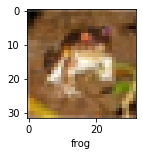

In [21]:
plot_sample(X_train, y_train, 0)

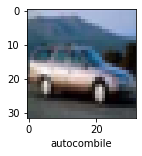

In [22]:
plot_sample(X_train, y_train, 4)

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8126 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6233 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5407 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4811 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4324 - accuracy: 0.4958


In [34]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.6461 - accuracy: 0.4105


[1.6461220979690552, 0.4104999899864197]

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0107 - accuracy: 0.2703
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5887 - accuracy: 0.4326
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4222 - accuracy: 0.4943
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3245 - accuracy: 0.5309
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2483 - accuracy: 0.5587


In [35]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3118 - accuracy: 0.5261


[1.3118466138839722, 0.5260999798774719]

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 1ms/step


array([[4.78215255e-02, 3.21120350e-03, 1.40350267e-01, 3.31209719e-01,
        7.80515596e-02, 1.99449196e-01, 1.06370360e-01, 2.14388240e-02,
        6.75246865e-02, 4.57268395e-03],
       [2.57002085e-01, 5.06487414e-02, 1.95264944e-03, 4.61728778e-05,
        4.95858316e-04, 1.26700479e-05, 2.34309864e-05, 8.29112178e-05,
        6.63540304e-01, 2.61951927e-02],
       [2.14641824e-01, 1.71697810e-01, 5.50662028e-03, 2.16698577e-03,
        5.16707450e-03, 6.45044027e-04, 2.49665463e-04, 1.86386076e-03,
        5.40943205e-01, 5.71179353e-02],
       [3.66636217e-01, 7.98299909e-03, 5.62407402e-03, 4.91068407e-04,
        4.26391745e-03, 1.05172679e-04, 2.96689803e-04, 6.07527734e-04,
        6.09370649e-01, 4.62182704e-03],
       [4.91245184e-04, 2.04173630e-04, 4.95672114e-02, 1.41649805e-02,
        8.72734904e-01, 1.09055405e-02, 4.79891710e-02, 3.32887843e-03,
        3.88361659e-04, 2.25526368e-04]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

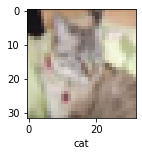

In [46]:
plot_sample(X_test, y_test, 8)

In [ ]:
classes

In [47]:
classes[y_classes[8]]

'deer'